# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.interpolate import make_interp_spline
plt.rc('figure', figsize=(15,10))

# Importing Data

In [2]:
df_wind_data = pd.read_csv('sao_joao_do_cariri_data.csv', sep=';')
df_wind_data.head()

,id,year,day,datetm,min,ws_25,wd_25,tp_25,ws_50,wd_50,tp_50
0,25,2008,1,01/01/2008 00:00,0,7.440,154.0,23.83,8.53,152.0,23.52
1,25,2008,1,01/01/2008 00:10,10,7.990,154.2,23.66,8.69,153.3,23.36
2,25,2008,1,01/01/2008 00:20,20,7.270,154.0,23.54,8.36,153.6,23.24
3,25,2008,1,01/01/2008 00:30,30,7.290,156.3,23.43,8.13,154.9,23.13
4,25,2008,1,01/01/2008 00:40,40,6.877,161.8,23.36,7.55,160.3,23.07


In [3]:
df_wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      52704 non-null  int64  
 1   year    52704 non-null  int64  
 2   day     52704 non-null  int64  
 3   datetm  52704 non-null  object 
 4   min     52704 non-null  int64  
 5   ws_25   52670 non-null  float64
 6   wd_25   52670 non-null  float64
 7   tp_25   52670 non-null  float64
 8   ws_50   52670 non-null  float64
 9   wd_50   52670 non-null  float64
 10  tp_50   52670 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.4+ MB


In [4]:
df_wind_data_length_before_treating = df_wind_data.shape[0]
df_wind_data_length_before_treating

52704

# Treating Data

In [5]:
df_wind_data.dropna(subset='ws_50', inplace=True)
df_wind_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52670 entries, 0 to 52703
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      52670 non-null  int64  
 1   year    52670 non-null  int64  
 2   day     52670 non-null  int64  
 3   datetm  52670 non-null  object 
 4   min     52670 non-null  int64  
 5   ws_25   52670 non-null  float64
 6   wd_25   52670 non-null  float64
 7   tp_25   52670 non-null  float64
 8   ws_50   52670 non-null  float64
 9   wd_50   52670 non-null  float64
 10  tp_50   52670 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.8+ MB


In [6]:
positive_wind_speed_selection = df_wind_data['ws_50'] > 0
df_wind_data = df_wind_data[positive_wind_speed_selection]
df_wind_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52662 entries, 0 to 52703
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      52662 non-null  int64  
 1   year    52662 non-null  int64  
 2   day     52662 non-null  int64  
 3   datetm  52662 non-null  object 
 4   min     52662 non-null  int64  
 5   ws_25   52662 non-null  float64
 6   wd_25   52662 non-null  float64
 7   tp_25   52662 non-null  float64
 8   ws_50   52662 non-null  float64
 9   wd_50   52662 non-null  float64
 10  tp_50   52662 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.8+ MB


In [7]:
df_wind_data_length_after_treating = df_wind_data.shape[0]
df_wind_data_length_after_treating

52662

In [8]:
dictionary_treating_data_information = {'Raw':{'Useful Data':df_wind_data_length_after_treating, 'Useless Data':(df_wind_data_length_before_treating- df_wind_data_length_after_treating), 'Total':df_wind_data_length_before_treating}, 'Percentage [%]':{'Useful Data':100*(df_wind_data_length_after_treating/df_wind_data_length_before_treating), 'Useless Data':100*((df_wind_data_length_before_treating - df_wind_data_length_after_treating)/df_wind_data_length_before_treating), 'Total':100*(df_wind_data_length_before_treating/df_wind_data_length_before_treating)}}
df_treating_data_information = pd.DataFrame(dictionary_treating_data_information)
df_treating_data_information = df_treating_data_information.round(2)
df_treating_data_information.head()

,Raw,Percentage [%]
Useful Data,52662,99.92
Useless Data,42,0.08
Total,52704,100.00


In [9]:
df_wind_data.head()

,id,year,day,datetm,min,ws_25,wd_25,tp_25,ws_50,wd_50,tp_50
0,25,2008,1,01/01/2008 00:00,0,7.440,154.0,23.83,8.53,152.0,23.52
1,25,2008,1,01/01/2008 00:10,10,7.990,154.2,23.66,8.69,153.3,23.36
2,25,2008,1,01/01/2008 00:20,20,7.270,154.0,23.54,8.36,153.6,23.24
3,25,2008,1,01/01/2008 00:30,30,7.290,156.3,23.43,8.13,154.9,23.13
4,25,2008,1,01/01/2008 00:40,40,6.877,161.8,23.36,7.55,160.3,23.07


# Data Frequency Distribution

In [10]:
maximum_velocity_50_meters = df_wind_data['ws_50'].max()
minimum_velocity_50_meters = df_wind_data['ws_50'].min()
print('Minimum Velocity at 50 meters height = '+str(minimum_velocity_50_meters)+' m/s')
print('Maximum Velocity at 50 meters height = '+str(maximum_velocity_50_meters)+' m/s')

Minimum Velocity at 50 meters height = 0.002 m/s
Maximum Velocity at 50 meters height = 12.98 m/s


In [11]:
median_velocity_50_meters = np.arange(0.5, math.ceil(maximum_velocity_50_meters))
lower_limit_velocity_50_meters = np.floor(median_velocity_50_meters)
upper_limit_velocity_50_meters = np.ceil(median_velocity_50_meters)
dictionary_frequency_distribution_wind_speed = {'Lower Limit Velocity [m/s]':lower_limit_velocity_50_meters,'Upper Limit Velocity [m/s]':upper_limit_velocity_50_meters, 'Median Velocity [m/s]':median_velocity_50_meters, 'Absolute Frequency':np.zeros(math.ceil(maximum_velocity_50_meters))}

In [12]:
df_frequency_distribution_wind_speed = pd.DataFrame(dictionary_frequency_distribution_wind_speed)
df_frequency_distribution_wind_speed.head(15)

,Lower Limit Velocity [m/s],Upper Limit Velocity [m/s],Median Velocity [m/s],Absolute Frequency
0,0.0,1.0,0.5,0.0
1,1.0,2.0,1.5,0.0
2,2.0,3.0,2.5,0.0
3,3.0,4.0,3.5,0.0
4,4.0,5.0,4.5,0.0
5,5.0,6.0,5.5,0.0
6,6.0,7.0,6.5,0.0
7,7.0,8.0,7.5,0.0
8,8.0,9.0,8.5,0.0
9,9.0,10.0,9.5,0.0


In [13]:
for i in df_wind_data['ws_50']:
    for j in range(0, df_frequency_distribution_wind_speed.shape[0]):
        if (i < df_frequency_distribution_wind_speed['Upper Limit Velocity [m/s]'][j]) and (i > df_frequency_distribution_wind_speed['Lower Limit Velocity [m/s]'][j]):
            df_frequency_distribution_wind_speed['Absolute Frequency'][j] = 1 + df_frequency_distribution_wind_speed['Absolute Frequency'][j]



In [14]:
df_frequency_distribution_wind_speed.insert(loc = (df_frequency_distribution_wind_speed.shape[1]),column = 'Relative Frequency', value = df_frequency_distribution_wind_speed['Absolute Frequency']/df_frequency_distribution_wind_speed['Absolute Frequency'].sum())
df_frequency_distribution_wind_speed.insert(loc = (df_frequency_distribution_wind_speed.shape[1]),column = 'Relative Frequency [%]', value = 100*df_frequency_distribution_wind_speed['Relative Frequency'])


In [15]:
df_frequency_distribution_wind_speed.head(15)

,Lower Limit Velocity [m/s],Upper Limit Velocity [m/s],Median Velocity [m/s],Absolute Frequency,Relative Frequency,Relative Frequency [%]
0,0.0,1.0,0.5,1179.0,0.022457,2.245714
1,1.0,2.0,1.5,3185.0,0.060667,6.066667
2,2.0,3.0,2.5,5235.0,0.099714,9.971429
3,3.0,4.0,3.5,7485.0,0.142571,14.257143
4,4.0,5.0,4.5,8197.0,0.156133,15.613333
5,5.0,6.0,5.5,7954.0,0.151505,15.150476
6,6.0,7.0,6.5,6794.0,0.129410,12.940952
7,7.0,8.0,7.5,5491.0,0.104590,10.459048
8,8.0,9.0,8.5,3726.0,0.070971,7.097143
9,9.0,10.0,9.5,2140.0,0.040762,4.076190


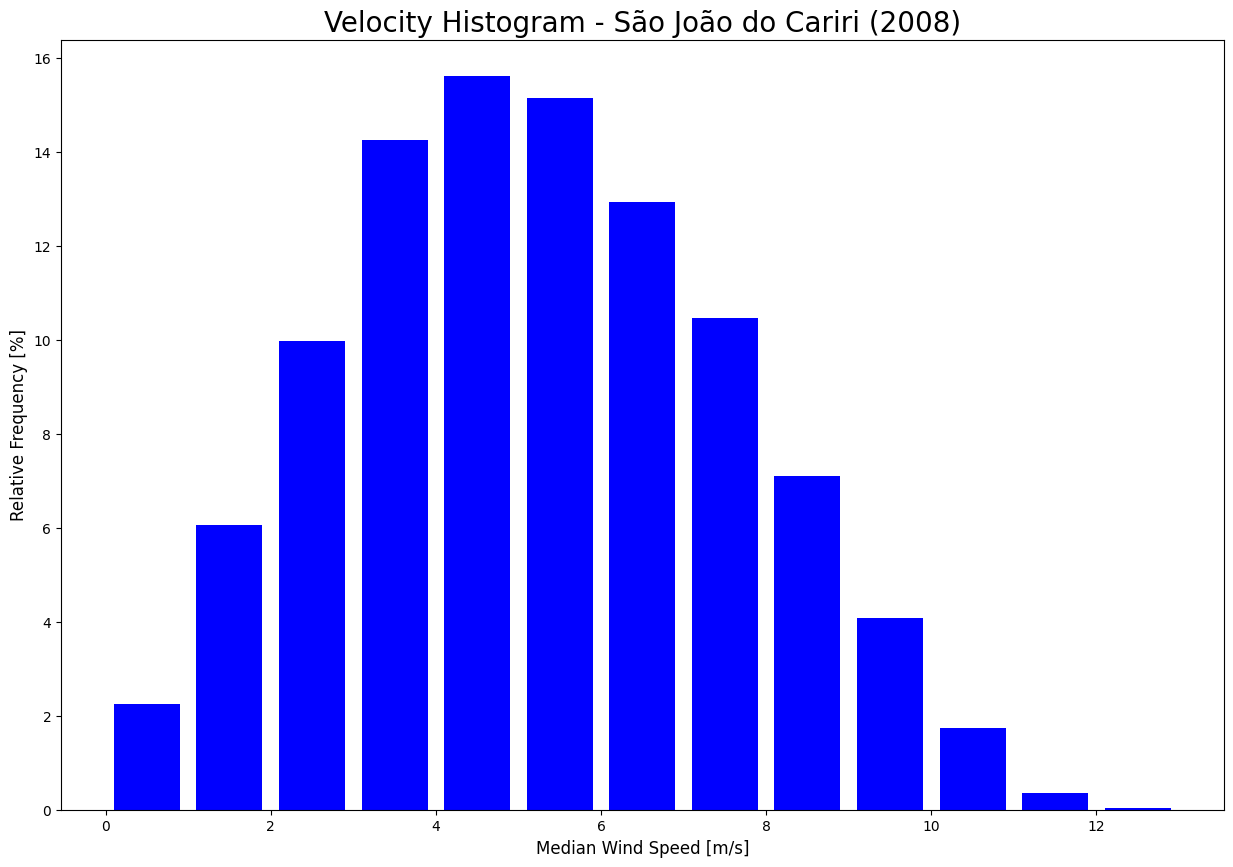

In [16]:
plt.bar(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], df_frequency_distribution_wind_speed['Relative Frequency [%]'], color='b')
plt.title('Velocity Histogram - São João do Cariri (2008)', fontsize=20)
plt.ylabel('Relative Frequency [%]', fontsize=12)
plt.xlabel('Median Wind Speed [m/s]', fontsize=12)
plt.savefig('velocity_histogram.png', dpi=300, bbox_inches='tight')

# Weibull Function

In [17]:
def weibull_distribution(k_weibull_function, c_weibull_function, method_name):
    
    partial_list_weibull_function = []

    for median_velocity in df_frequency_distribution_wind_speed['Median Velocity [m/s]']:
        
        neperian_factor = math.exp(-(median_velocity/c_weibull_function)**k_weibull_function)
        
        partial_list_weibull_function.append(((k_weibull_function/c_weibull_function)*((median_velocity/c_weibull_function)**(k_weibull_function - 1)))*(neperian_factor))
        
    df_frequency_distribution_wind_speed.insert(loc = df_frequency_distribution_wind_speed.shape[1], column = method_name, value=partial_list_weibull_function)

    return

# Computing K and C values

In [18]:
df_factors_for_caculate_k_and_c = pd.DataFrame(columns = ['velocity_10M_power_k', 'ln_velocity_10M', 'velocity_10M_power_k_product_ln_velocity_10M'], index = range(df_wind_data.shape[0]))
df_factors_for_caculate_k_and_c.head()

,velocity_10M_power_k,ln_velocity_10M,velocity_10M_power_k_product_ln_velocity_10M
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [19]:
df_factors_k_and_c = pd.DataFrame(columns=['K', 'C'], index=['Maximum Likelihood', 'Energy Pattern Factor', 'Moment', 'Empirical'])
df_factors_k_and_c.head()

,K,C
Maximum Likelihood,NaN,NaN
Energy Pattern Factor,NaN,NaN
Moment,NaN,NaN
Empirical,NaN,NaN


## Maximum Likelihood

In [20]:
k_partial_maximum_likelihood = 2

df_factors_for_caculate_k_and_c['velocity_10M_power_k'] = df_wind_data['ws_50']**k_partial_maximum_likelihood

df_factors_for_caculate_k_and_c.head()

,velocity_10M_power_k,ln_velocity_10M,velocity_10M_power_k_product_ln_velocity_10M
0,72.7609,NaN,NaN
1,75.5161,NaN,NaN
2,69.8896,NaN,NaN
3,66.0969,NaN,NaN
4,57.0025,NaN,NaN


In [21]:
partial_ln_velocity_10M = []

for velocity_10M in df_wind_data['ws_50']:
    partial_ln_velocity_10M.append(math.log(velocity_10M))

df_factors_for_caculate_k_and_c['ln_velocity_10M'] = partial_ln_velocity_10M

df_factors_for_caculate_k_and_c.head()

,velocity_10M_power_k,ln_velocity_10M,velocity_10M_power_k_product_ln_velocity_10M
0,72.7609,2.143589,NaN
1,75.5161,2.162173,NaN
2,69.8896,2.123458,NaN
3,66.0969,2.095561,NaN
4,57.0025,2.021548,NaN


In [22]:
df_factors_for_caculate_k_and_c['velocity_10M_power_k_product_ln_velocity_10M'] = df_factors_for_caculate_k_and_c['velocity_10M_power_k'] * df_factors_for_caculate_k_and_c['ln_velocity_10M']
df_factors_for_caculate_k_and_c.head()

,velocity_10M_power_k,ln_velocity_10M,velocity_10M_power_k_product_ln_velocity_10M
0,72.7609,2.143589,155.969491
1,75.5161,2.162173,163.278868
2,69.8896,2.123458,148.407660
3,66.0969,2.095561,138.510081
4,57.0025,2.021548,115.233265


In [23]:
k_final_maximum_likelihood = ((df_factors_for_caculate_k_and_c['velocity_10M_power_k_product_ln_velocity_10M'].sum())/(df_factors_for_caculate_k_and_c['velocity_10M_power_k'].sum())-(df_factors_for_caculate_k_and_c['ln_velocity_10M'].sum())/(df_frequency_distribution_wind_speed['Absolute Frequency'].sum()))**(-1)
print('Before iterations -> k_final_maximum_likelihood = '+ str(k_final_maximum_likelihood.round(3)))

Before iterations -> k_final_maximum_likelihood = 5.627


In [24]:
while abs(k_final_maximum_likelihood - k_partial_maximum_likelihood) > 10**(-5):
    
    k_partial_maximum_likelihood = k_final_maximum_likelihood
    
    df_factors_for_caculate_k_and_c['velocity_10M_power_k'] = df_wind_data['ws_50']**k_partial_maximum_likelihood
    df_factors_for_caculate_k_and_c['velocity_10M_power_k_product_ln_velocity_10M'] = df_factors_for_caculate_k_and_c['velocity_10M_power_k'] * df_factors_for_caculate_k_and_c['ln_velocity_10M']

    k_final_maximum_likelihood = ((df_factors_for_caculate_k_and_c['velocity_10M_power_k_product_ln_velocity_10M'].sum())/(df_factors_for_caculate_k_and_c['velocity_10M_power_k'].sum())-(df_factors_for_caculate_k_and_c['ln_velocity_10M'].sum())/(df_frequency_distribution_wind_speed['Absolute Frequency'].sum()))**(-1)
    
print('After iterations -> k_final_maximum_likelihood = '+ str(k_final_maximum_likelihood.round(3)))

After iterations -> k_final_maximum_likelihood = 3.959


In [25]:
c_maximum_likelihood = ((df_factors_for_caculate_k_and_c['velocity_10M_power_k'].sum())/(df_frequency_distribution_wind_speed['Absolute Frequency'].sum()))**(1/k_final_maximum_likelihood)
print('c_maximum_likelihood = '+ str(c_maximum_likelihood.round(3)))

c_maximum_likelihood = 6.472


In [26]:
df_factors_k_and_c['K']['Maximum Likelihood'] = k_final_maximum_likelihood.round(3)
df_factors_k_and_c['C']['Maximum Likelihood'] = c_maximum_likelihood.round(3)
df_factors_k_and_c.head()

,K,C
Maximum Likelihood,3.959,6.472
Energy Pattern Factor,NaN,NaN
Moment,NaN,NaN
Empirical,NaN,NaN


In [27]:
weibull_distribution(k_final_maximum_likelihood, c_maximum_likelihood, 'Maximum Likelihood Method')
df_frequency_distribution_wind_speed.head()

,Lower Limit Velocity [m/s],Upper Limit Velocity [m/s],Median Velocity [m/s],Absolute Frequency,Relative Frequency,Relative Frequency [%],Maximum Likelihood Method
0,0.0,1.0,0.5,1179.0,0.022457,2.245714,0.000313
1,1.0,2.0,1.5,3185.0,0.060667,6.066667,0.008056
2,2.0,3.0,2.5,5235.0,0.099714,9.971429,0.035804
3,3.0,4.0,3.5,7485.0,0.142571,14.257143,0.090858
4,4.0,5.0,4.5,8197.0,0.156133,15.613333,0.164610


## Energy Pattern Factor

In [28]:
df_factors_for_caculate_k_and_c.insert(loc = df_factors_for_caculate_k_and_c.shape[1], column = 'velocity_10M_power_3', value = (df_wind_data['ws_50']**3))
df_factors_for_caculate_k_and_c.head()

,velocity_10M_power_k,ln_velocity_10M,velocity_10M_power_k_product_ln_velocity_10M,velocity_10M_power_3
0,4853.602228,2.143589,10404.130102,620.650477
1,5224.203071,2.162173,11295.630509,656.234909
2,4481.748850,2.123458,9516.807363,584.277056
3,4013.059939,2.095561,8409.611593,537.367797
4,2993.671001,2.021548,6051.848317,430.368875


In [29]:
velocity_10M_power_3_mean = df_factors_for_caculate_k_and_c['velocity_10M_power_3'].mean()

mean_velocity_10M = df_wind_data['ws_50'].mean()

mean_velocity_10M_power_3 = (mean_velocity_10M)**3

energy_pattern_factor = velocity_10M_power_3_mean/mean_velocity_10M_power_3

## computing k and c

k_energy_pattern = 1 + (3.69/(energy_pattern_factor**2))

c_energy_pattern = mean_velocity_10M/(math.gamma(1 + (1/k_energy_pattern)))


In [30]:
print('k_energy_pattern = '+ str(k_energy_pattern.round(3)))
print('c_energy_pattern = '+ str(c_energy_pattern.round(3)))

k_energy_pattern = 2.427
c_energy_pattern = 5.908


In [31]:
df_factors_k_and_c['K']['Energy Pattern Factor'] = k_energy_pattern.round(3)
df_factors_k_and_c['C']['Energy Pattern Factor'] = c_energy_pattern.round(3)
df_factors_k_and_c.head()

,K,C
Maximum Likelihood,3.959,6.472
Energy Pattern Factor,2.427,5.908
Moment,NaN,NaN
Empirical,NaN,NaN


In [32]:
weibull_distribution(k_energy_pattern, c_energy_pattern, 'Energy Pattern Factor Method')
df_frequency_distribution_wind_speed.head()

,Lower Limit Velocity [m/s],Upper Limit Velocity [m/s],Median Velocity [m/s],Absolute Frequency,Relative Frequency,Relative Frequency [%],Maximum Likelihood Method,Energy Pattern Factor Method
0,0.0,1.0,0.5,1179.0,0.022457,2.245714,0.000313,0.012081
1,1.0,2.0,1.5,3185.0,0.060667,6.066667,0.008056,0.056035
2,2.0,3.0,2.5,5235.0,0.099714,9.971429,0.035804,0.106360
3,3.0,4.0,3.5,7485.0,0.142571,14.257143,0.090858,0.146990
4,4.0,5.0,4.5,8197.0,0.156133,15.613333,0.164610,0.166195


## Moment

In [33]:
standard_deviation_velocity_10M = df_wind_data['ws_50'].std()
standard_deviation_velocity_10M

2.332079242390083

In [34]:
def f1_f2(factors_k_and_c_moment):
    
    f1 = factors_k_and_c_moment[1]*math.gamma(1 + (1/factors_k_and_c_moment[0])) - mean_velocity_10M
    f2 = factors_k_and_c_moment[1]*math.sqrt(math.gamma(1 + (2/factors_k_and_c_moment[0])) - math.gamma(1 + (1/factors_k_and_c_moment[0]))) - standard_deviation_velocity_10M
    
    return [f1, f2]

In [35]:
k_moment, c_moment = fsolve(f1_f2, [1, 2])

print('k_moment = '+ str(k_moment.round(3)))
print('c_moment = '+ str(c_moment.round(3)))

k_moment = 1.822
c_moment = 5.894


In [36]:
weibull_distribution(k_moment, c_moment, 'Moment Method')
df_frequency_distribution_wind_speed.head()

,Lower Limit Velocity [m/s],Upper Limit Velocity [m/s],Median Velocity [m/s],Absolute Frequency,Relative Frequency,Relative Frequency [%],Maximum Likelihood Method,Energy Pattern Factor Method,Moment Method
0,0.0,1.0,0.5,1179.0,0.022457,2.245714,0.000313,0.012081,0.040239
1,1.0,2.0,1.5,3185.0,0.060667,6.066667,0.008056,0.056035,0.092418
2,2.0,3.0,2.5,5235.0,0.099714,9.971429,0.035804,0.106360,0.123868
3,3.0,4.0,3.5,7485.0,0.142571,14.257143,0.090858,0.146990,0.136789
4,4.0,5.0,4.5,8197.0,0.156133,15.613333,0.164610,0.166195,0.134330


In [37]:
df_factors_k_and_c['K']['Moment'] = k_moment.round(3)
df_factors_k_and_c['C']['Moment'] = c_moment.round(3)
df_factors_k_and_c.head()

,K,C
Maximum Likelihood,3.959,6.472
Energy Pattern Factor,2.427,5.908
Moment,1.822,5.894
Empirical,NaN,NaN


## Empirical

In [38]:
k_empirical = (standard_deviation_velocity_10M/mean_velocity_10M)**(-1.086)
c_empirical = mean_velocity_10M/(math.gamma(1 + (1/k_empirical)))

print('k_empirical = '+ str(k_empirical.round(3)))
print('c_empirical = '+ str(c_empirical.round(3)))

k_empirical = 2.408
c_empirical = 5.909


In [39]:
weibull_distribution(k_empirical, c_empirical, 'Empirical Method')
df_frequency_distribution_wind_speed.head()

,Lower Limit Velocity [m/s],Upper Limit Velocity [m/s],Median Velocity [m/s],Absolute Frequency,Relative Frequency,Relative Frequency [%],Maximum Likelihood Method,Energy Pattern Factor Method,Moment Method,Empirical Method
0,0.0,1.0,0.5,1179.0,0.022457,2.245714,0.000313,0.012081,0.040239,0.012553
1,1.0,2.0,1.5,3185.0,0.060667,6.066667,0.008056,0.056035,0.092418,0.056983
2,2.0,3.0,2.5,5235.0,0.099714,9.971429,0.035804,0.106360,0.123868,0.107008
3,3.0,4.0,3.5,7485.0,0.142571,14.257143,0.090858,0.146990,0.136789,0.146846
4,4.0,5.0,4.5,8197.0,0.156133,15.613333,0.164610,0.166195,0.134330,0.165281


In [40]:
df_factors_k_and_c['K']['Empirical'] = k_empirical.round(3)
df_factors_k_and_c['C']['Empirical'] = c_empirical.round(3)
df_factors_k_and_c.head()

,K,C
Maximum Likelihood,3.959,6.472
Energy Pattern Factor,2.427,5.908
Moment,1.822,5.894
Empirical,2.408,5.909


# Plotting curves and histogram

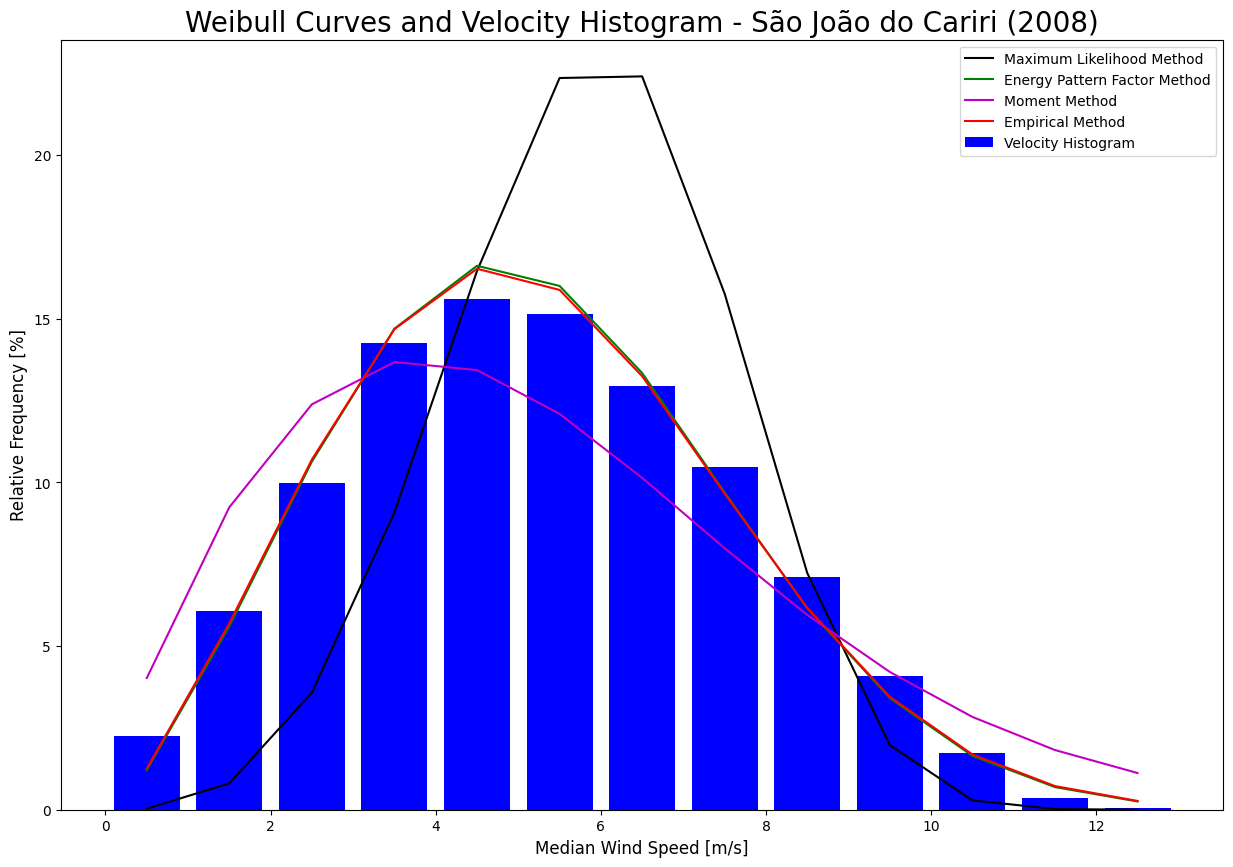

In [41]:
plt.bar(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], df_frequency_distribution_wind_speed['Relative Frequency [%]'], label='Velocity Histogram',color='b')
plt.plot(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], 100*df_frequency_distribution_wind_speed['Maximum Likelihood Method'], label='Maximum Likelihood Method',color='k')
plt.plot(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], 100*df_frequency_distribution_wind_speed['Energy Pattern Factor Method'], label='Energy Pattern Factor Method',color='g')
plt.plot(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], 100*df_frequency_distribution_wind_speed['Moment Method'], label='Moment Method',color='m')
plt.plot(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], 100*df_frequency_distribution_wind_speed['Empirical Method'], label='Empirical Method',color='r')
plt.title('Weibull Curves and Velocity Histogram - São João do Cariri (2008)', fontsize=20)
plt.ylabel('Relative Frequency [%]', fontsize=12)
plt.xlabel('Median Wind Speed [m/s]', fontsize=12)
plt.legend()
plt.savefig('velocity_histogram_and_weibull_curves.png', dpi=300, bbox_inches='tight')

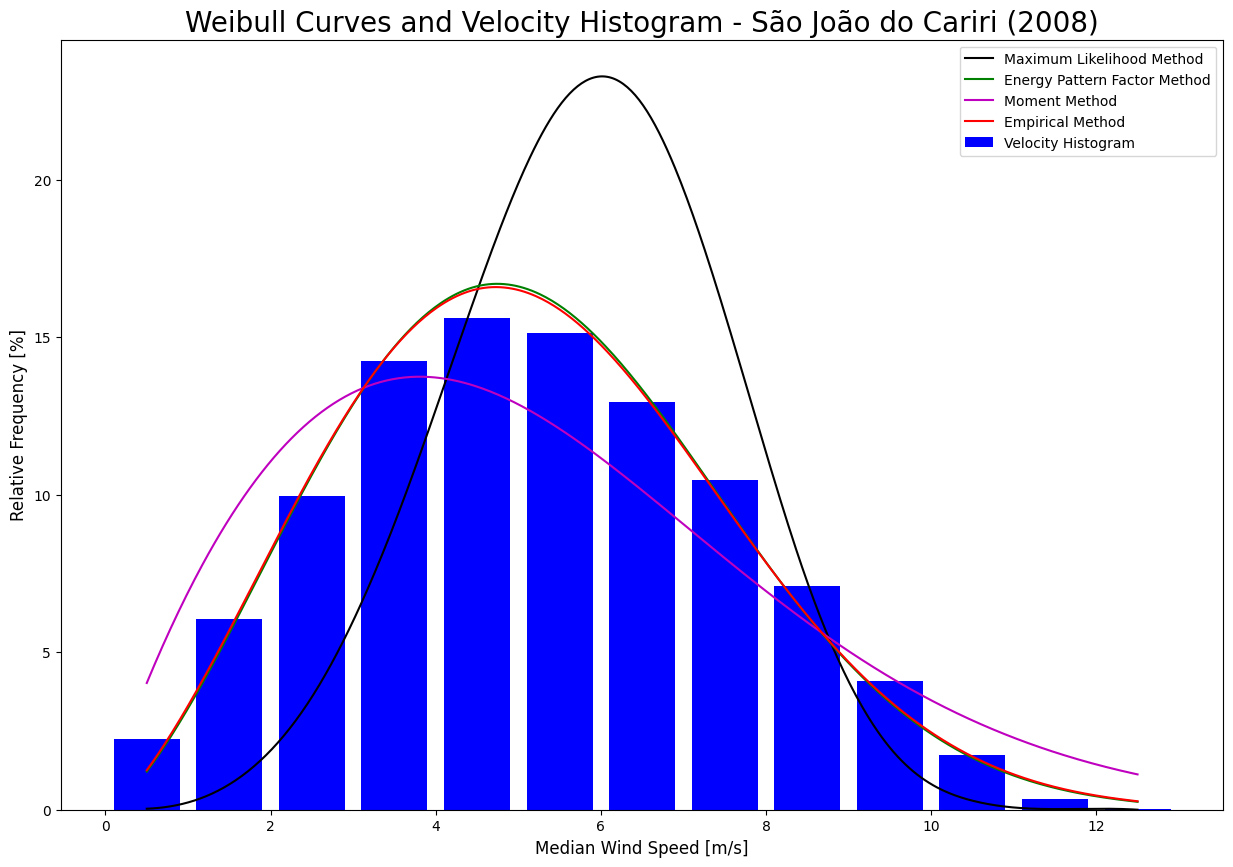

In [42]:
# FINAL PLOTTING

median_velocity_array = np.array(df_frequency_distribution_wind_speed['Median Velocity [m/s]'])

new_median_velocity_array = np.linspace(median_velocity_array.min(), median_velocity_array.max(), 500)

## smooth curve maximum likelihood

maximum_likelihood_array = np.array(df_frequency_distribution_wind_speed['Maximum Likelihood Method'])

maximum_likelihood_spline = make_interp_spline(median_velocity_array, maximum_likelihood_array) 

new_maximum_likelihood_spline = maximum_likelihood_spline(new_median_velocity_array)

## smooth curve energy pattern factor method
energy_pattern_factor_array = np.array(df_frequency_distribution_wind_speed['Energy Pattern Factor Method'])

energy_pattern_factor_spline = make_interp_spline(median_velocity_array, energy_pattern_factor_array) 

new_energy_pattern_factor_spline = energy_pattern_factor_spline(new_median_velocity_array)

## smooth curve moment method
moment_array = np.array(df_frequency_distribution_wind_speed['Moment Method'])

moment_spline = make_interp_spline(median_velocity_array, moment_array) 

new_moment_spline = moment_spline(new_median_velocity_array)

## smooth curve empirical method
empirical_array = np.array(df_frequency_distribution_wind_speed['Empirical Method'])

empirical_spline = make_interp_spline(median_velocity_array, empirical_array) 

new_empirical_spline = empirical_spline(new_median_velocity_array)

plt.bar(df_frequency_distribution_wind_speed['Median Velocity [m/s]'], df_frequency_distribution_wind_speed['Relative Frequency [%]'], label = 'Velocity Histogram', color='b')
plt.title('Weibull Curves and Velocity Histogram - São João do Cariri (2008)', fontsize=20)
plt.ylabel('Relative Frequency [%]', fontsize=12)
plt.xlabel('Median Wind Speed [m/s]', fontsize=12)
plt.plot(new_median_velocity_array, 100*new_maximum_likelihood_spline, label = 'Maximum Likelihood Method', color = 'k')
plt.plot(new_median_velocity_array, 100*new_energy_pattern_factor_spline, label = 'Energy Pattern Factor Method', color = 'g')
plt.plot(new_median_velocity_array, 100*new_moment_spline, label = 'Moment Method', color = 'm')
plt.plot(new_median_velocity_array, 100*new_empirical_spline, label = 'Empirical Method', color = 'r')
plt.legend()
plt.savefig('velocity_histogram_and_weibull_curves_smooth.png', dpi = 300, bbox_inches = 'tight')

# Computing Error Metrics

In [43]:
df_errors_metrics_factors_k_and_c = pd.DataFrame(columns=['RMSE', 'R2'], index=['Maximum Likelihood', 'Energy Pattern Factor', 'Moment', 'Empirical'])
df_errors_metrics_factors_k_and_c.head()

,RMSE,R2
Maximum Likelihood,NaN,NaN
Energy Pattern Factor,NaN,NaN
Moment,NaN,NaN
Empirical,NaN,NaN


## RMSE (Root Mean Square Error)

In [44]:
rmse_maximum_likelihood = mean_squared_error(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Maximum Likelihood Method'], squared = False)
rmse_energy_pattern_factor = mean_squared_error(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Energy Pattern Factor Method'], squared = False)
rmse_moment = mean_squared_error(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Moment Method'], squared = False)
rmse_empirical = mean_squared_error(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Empirical Method'], squared = False)

In [45]:
df_errors_metrics_factors_k_and_c['RMSE']['Maximum Likelihood'] = rmse_maximum_likelihood.round(5)
df_errors_metrics_factors_k_and_c['RMSE']['Energy Pattern Factor'] = rmse_energy_pattern_factor.round(5)
df_errors_metrics_factors_k_and_c['RMSE']['Moment'] = rmse_moment.round(5)
df_errors_metrics_factors_k_and_c['RMSE']['Empirical'] = rmse_empirical.round(5)

df_errors_metrics_factors_k_and_c.head()

,RMSE,R2
Maximum Likelihood,0.04617,NaN
Energy Pattern Factor,0.00675,NaN
Moment,0.02026,NaN
Empirical,0.00644,NaN


## R2 (Variance Analysis)

In [46]:
r2_maximum_likelihood = r2_score(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Maximum Likelihood Method'])
r2_energy_pattern_factor = r2_score(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Energy Pattern Factor Method'])
r2_moment = r2_score(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Moment Method'])
r2_empirical = r2_score(df_frequency_distribution_wind_speed['Relative Frequency'], df_frequency_distribution_wind_speed['Empirical Method'])

## Error Metrics Results

In [47]:
df_errors_metrics_factors_k_and_c['R2']['Maximum Likelihood'] = r2_maximum_likelihood.round(5)
df_errors_metrics_factors_k_and_c['R2']['Energy Pattern Factor'] = r2_energy_pattern_factor.round(5)
df_errors_metrics_factors_k_and_c['R2']['Moment'] = r2_moment.round(5)
df_errors_metrics_factors_k_and_c['R2']['Empirical'] = r2_empirical.round(5)

df_errors_metrics_factors_k_and_c.head()

,RMSE,R2
Maximum Likelihood,0.04617,0.29941
Energy Pattern Factor,0.00675,0.98503
Moment,0.02026,0.86513
Empirical,0.00644,0.98637


<b> Método Escolhido :</b> <i>Empírico</i>


# Power Computing

In [48]:
air_density = 1.2928 #[kg/m³]

df_power_data = pd.DataFrame(columns=['Median Velocity [m/s]', 'Wind Power Available - N90/2500 [kW]', 'Wind Power Available - V80/2000 [kW]','Capacity Factor - N90/2500', 'Capacity Factor - V80/2000' , 'Annual Energy Production - N90/2500', 'Annual Energy Production - V80/2000'], index=range(df_frequency_distribution_wind_speed.shape[0]))

df_power_data['Median Velocity [m/s]'] = median_velocity_50_meters

df_power_data.head()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
1,1.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2.5,NaN,NaN,NaN,NaN,NaN,NaN
3,3.5,NaN,NaN,NaN,NaN,NaN,NaN
4,4.5,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_nominal_power_wind_turbines = pd.DataFrame(columns=['Median Velocity [m/s]','Nominal Power - N90/2500 [kW]', 'Nominal Power - V80/2000 [kW]'], index=range(25))

df_nominal_power_wind_turbines['Median Velocity [m/s]'] = np.arange(0.5, 25)

df_nominal_power_wind_turbines.head()

,Median Velocity [m/s],Nominal Power - N90/2500 [kW],Nominal Power - V80/2000 [kW]
0,0.5,NaN,NaN
1,1.5,NaN,NaN
2,2.5,NaN,NaN
3,3.5,NaN,NaN
4,4.5,NaN,NaN


## Wind Turbine 1

<ul>
    <li><b>Model:</b> <i>N90/2500</i></li> 
    <li><b>Nominal Power [kW]:</b> <i>2500</i></li> 
    <li><b>Rotor Area [m²]:</b> <i>6362</i></li>
    <li><b>Cut-in Wind Speed [m/s]:</b> <i>3</i></li> 
    <li><b>Cut-off Wind Speed [m/s]:</b> <i>25</i></li>
</ul> 

In [50]:
wind_speed_cut_in_wind_turbine_1 = 3
wind_speed_cut_off_wind_turbine_1 = 25

In [51]:
df_nominal_power_wind_turbines['Nominal Power - N90/2500 [kW]'] = [0, 0, 0, 17, 119, 269, 472, 746, 1097, 1515, 1969, 2288, 2456, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500]

df_nominal_power_wind_turbines.head()

,Median Velocity [m/s],Nominal Power - N90/2500 [kW],Nominal Power - V80/2000 [kW]
0,0.5,0,NaN
1,1.5,0,NaN
2,2.5,0,NaN
3,3.5,17,NaN
4,4.5,119,NaN


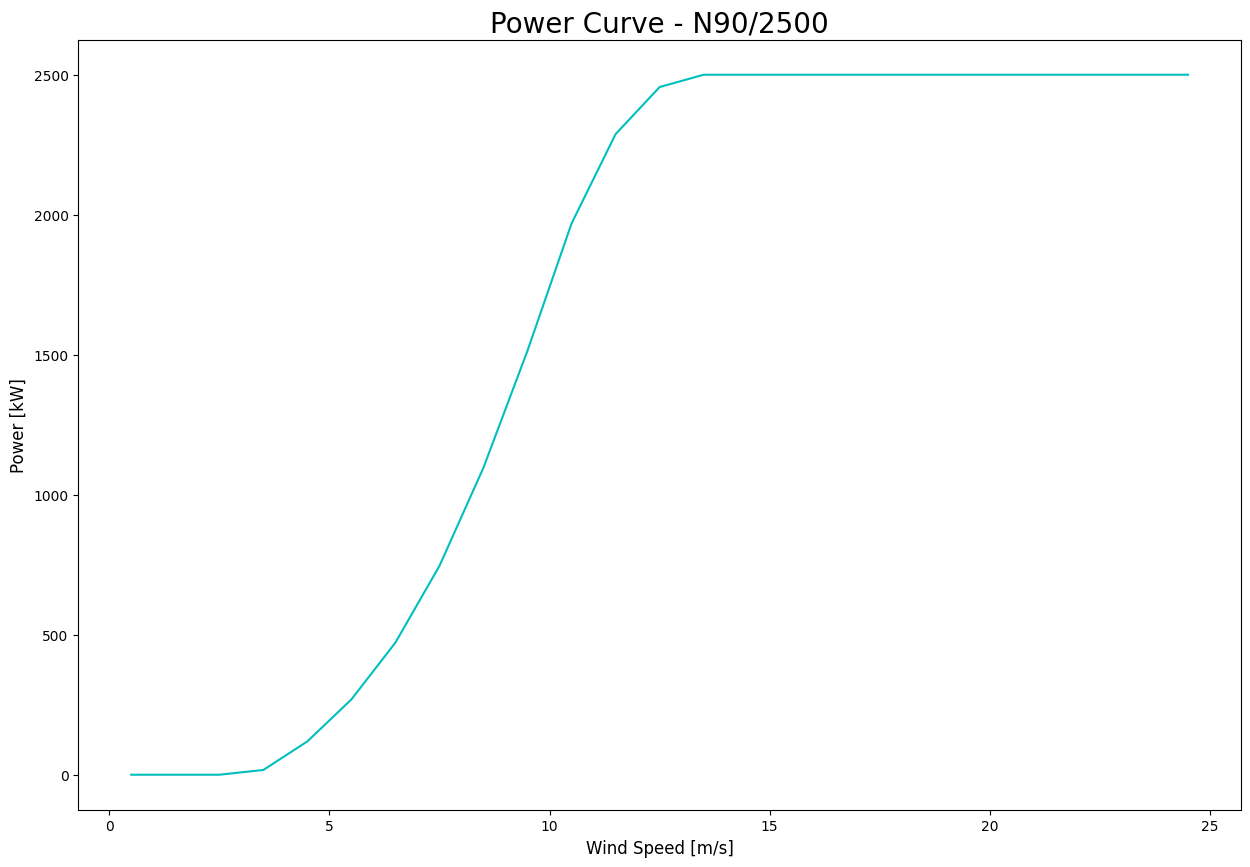

In [52]:
plt.plot(df_nominal_power_wind_turbines['Median Velocity [m/s]'], df_nominal_power_wind_turbines['Nominal Power - N90/2500 [kW]'], color='c')
plt.title('Power Curve - N90/2500', fontsize=20)
plt.ylabel('Power [kW]', fontsize=12)
plt.xlabel('Wind Speed [m/s]', fontsize=12)
plt.savefig('power_curve_wind_turbine_1.png', dpi=300, bbox_inches='tight')

### Wind Power Available - Wind Turbine 1

In [53]:
rotor_area_wind_turbine_1 = 6362 #[m²]

df_power_data['Wind Power Available - N90/2500 [kW]'] = 0.5 * ((df_frequency_distribution_wind_speed['Median Velocity [m/s]'])**3) * air_density * rotor_area_wind_turbine_1/1000

df_power_data.head()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
0,0.5,0.514050,NaN,NaN,NaN,NaN,NaN
1,1.5,13.879339,NaN,NaN,NaN,NaN,NaN
2,2.5,64.256200,NaN,NaN,NaN,NaN,NaN
3,3.5,176.319013,NaN,NaN,NaN,NaN,NaN
4,4.5,374.742158,NaN,NaN,NaN,NaN,NaN


### Capacity Factor - Wind Turbine 1

In [54]:
df_power_data['Capacity Factor - N90/2500'] = (math.exp(-(wind_speed_cut_in_wind_turbine_1/c_empirical)**(k_empirical)) - np.exp(-(df_power_data['Median Velocity [m/s]']/c_empirical)**(k_empirical)))/((df_power_data['Median Velocity [m/s]']/c_empirical)**(k_empirical) - (wind_speed_cut_in_wind_turbine_1/c_empirical)**(k_empirical)) - math.exp(-(wind_speed_cut_off_wind_turbine_1/c_empirical)**(k_empirical))

df_power_data.head()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
0,0.5,0.514050,NaN,0.907110,NaN,NaN,NaN
1,1.5,13.879339,NaN,0.891279,NaN,NaN,NaN
2,2.5,64.256200,NaN,0.851687,NaN,NaN,NaN
3,3.5,176.319013,NaN,0.787354,NaN,NaN,NaN
4,4.5,374.742158,NaN,0.702678,NaN,NaN,NaN


### Annual Energy Production - Wind Turbine 1

In [55]:
df_power_data['Annual Energy Production - N90/2500'] = df_power_data['Capacity Factor - N90/2500'] * df_nominal_power_wind_turbines['Nominal Power - N90/2500 [kW]'][:df_frequency_distribution_wind_speed.shape[0]] * 8760

annual_energy_production_total_wind_turbine_1 = df_power_data['Annual Energy Production - N90/2500'].sum()

df_power_data.tail()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
8,8.5,2525.525685,NaN,0.331879,NaN,3.189269e+06,NaN
9,9.5,3525.866206,NaN,0.264791,NaN,3.514142e+06,NaN
10,10.5,4760.613346,NaN,0.211728,NaN,3.651970e+06,NaN
11,11.5,6254.441483,NaN,0.170778,NaN,3.422880e+06,NaN
12,12.5,8032.025000,NaN,0.139466,NaN,3.000556e+06,NaN


In [56]:
print('Annual Energy Production Total - Wind Turbine 1 [kW] = '+str(annual_energy_production_total_wind_turbine_1.round(2)))

Annual Energy Production Total - Wind Turbine 1 [kW] = 23851353.5


## Wind Turbine 2

<ul>
    <li><b>Model:</b> <i>V80/2000</i></li> 
    <li><b>Nominal Power [kW]:</b> <i>2000</i></li> 
    <li><b>Rotor Area [m²]:</b> <i>5027</i></li>
    <li><b>Cut-in Wind Speed [m/s]:</b> <i>3.5</i></li> 
    <li><b>Cut-off Wind Speed [m/s]:</b> <i>25</i></li>
</ul> 

In [57]:
wind_speed_cut_in_wind_turbine_2 = 3
wind_speed_cut_off_wind_turbine_2 = 25

In [58]:
df_nominal_power_wind_turbines['Nominal Power - V80/2000 [kW]'] = [0, 0, 0, 35, 117, 225, 372, 580, 832, 1127, 1428, 1678, 1865, 1966, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]

df_nominal_power_wind_turbines.head()

,Median Velocity [m/s],Nominal Power - N90/2500 [kW],Nominal Power - V80/2000 [kW]
0,0.5,0,0
1,1.5,0,0
2,2.5,0,0
3,3.5,17,35
4,4.5,119,117


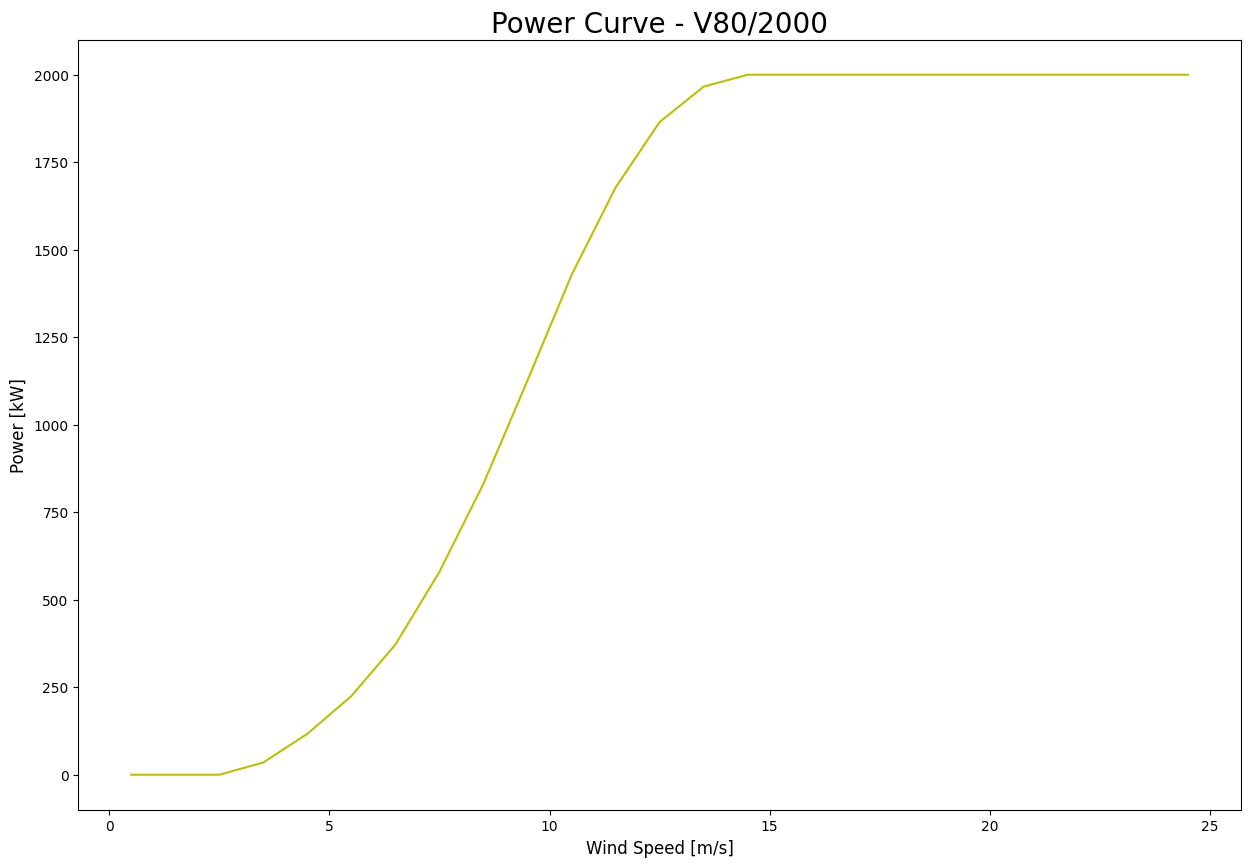

In [59]:
plt.plot(df_nominal_power_wind_turbines['Median Velocity [m/s]'], df_nominal_power_wind_turbines['Nominal Power - V80/2000 [kW]'], color='y')
plt.title('Power Curve - V80/2000', fontsize=20)
plt.ylabel('Power [kW]', fontsize=12)
plt.xlabel('Wind Speed [m/s]', fontsize=12)
plt.savefig('power_curve_wind_turbine_2.png', dpi=300, bbox_inches='tight')

### Wind Power Available - Wind Turbine 2

In [60]:
rotor_area_wind_turbine_2 = 5027 #[m²]

df_power_data['Wind Power Available - V80/2000 [kW]'] = 0.5 * ((df_frequency_distribution_wind_speed['Median Velocity [m/s]'])**3) * air_density * rotor_area_wind_turbine_2/1000

df_power_data.head()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
0,0.5,0.514050,0.406182,0.907110,NaN,0.000000,NaN
1,1.5,13.879339,10.966903,0.891279,NaN,0.000000,NaN
2,2.5,64.256200,50.772700,0.851687,NaN,0.000000,NaN
3,3.5,176.319013,139.320289,0.787354,NaN,117252.689953,NaN
4,4.5,374.742158,296.106386,0.702678,NaN,732499.889757,NaN


### Capacity Factor - Wind Turbine 2

In [61]:
df_power_data['Capacity Factor - V80/2000'] = (math.exp(-(wind_speed_cut_in_wind_turbine_2/c_empirical)**(k_empirical)) - np.exp(-(df_power_data['Median Velocity [m/s]']/c_empirical)**(k_empirical)))/((df_power_data['Median Velocity [m/s]']/c_empirical)**(k_empirical) - (wind_speed_cut_in_wind_turbine_2/c_empirical)**(k_empirical)) - math.exp(-(wind_speed_cut_off_wind_turbine_2/c_empirical)**(k_empirical))

df_power_data.head()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
0,0.5,0.514050,0.406182,0.907110,0.907110,0.000000,NaN
1,1.5,13.879339,10.966903,0.891279,0.891279,0.000000,NaN
2,2.5,64.256200,50.772700,0.851687,0.851687,0.000000,NaN
3,3.5,176.319013,139.320289,0.787354,0.787354,117252.689953,NaN
4,4.5,374.742158,296.106386,0.702678,0.702678,732499.889757,NaN


### Annual Energy Production - Wind Turbine 2

In [62]:
df_power_data['Annual Energy Production - V80/2000'] = df_power_data['Capacity Factor - V80/2000'] * df_nominal_power_wind_turbines['Nominal Power - V80/2000 [kW]'][:df_frequency_distribution_wind_speed.shape[0]] * 8760

annual_energy_production_total_wind_turbine_2 = df_power_data['Annual Energy Production - V80/2000'].sum()

df_power_data.head()

,Median Velocity [m/s],Wind Power Available - N90/2500 [kW],Wind Power Available - V80/2000 [kW],Capacity Factor - N90/2500,Capacity Factor - V80/2000,Annual Energy Production - N90/2500,Annual Energy Production - V80/2000
0,0.5,0.514050,0.406182,0.907110,0.907110,0.000000,0.000000
1,1.5,13.879339,10.966903,0.891279,0.891279,0.000000,0.000000
2,2.5,64.256200,50.772700,0.851687,0.851687,0.000000,0.000000
3,3.5,176.319013,139.320289,0.787354,0.787354,117252.689953,241402.596963
4,4.5,374.742158,296.106386,0.702678,0.702678,732499.889757,720188.967240


In [63]:
print('Energy Out Total - Wind Turbine 2 [kW] = '+str(annual_energy_production_total_wind_turbine_2.round(2)))

Energy Out Total - Wind Turbine 2 [kW] = 18376542.57


# Hydrogen Mass Production

In [64]:
# Hydrogen Mass Production by Water Electrolysis

rectifier_efficiency = 0.9 
electrolyzer_energy_demand = 5.5 # [kWh/Nm³]

# the factor 11.13 has the dimension [Nm³/kg]

## Wind Turbine 1

In [65]:
hydrogen_mass_wind_turbine_1 = ((annual_energy_production_total_wind_turbine_1 * rectifier_efficiency)/electrolyzer_energy_demand)/11.3 #[kg]

print('Hydrogen Mass - Wind Turbine 1 [kg] = '+str(hydrogen_mass_wind_turbine_1.round(2)))

Hydrogen Mass - Wind Turbine 1 [kg] = 345393.7


## Wind Turbine 2

In [66]:
hydrogen_mass_wind_turbine_2 = ((annual_energy_production_total_wind_turbine_2 * rectifier_efficiency)/electrolyzer_energy_demand)/11.3 #[kg]

print('Hydrogen Mass - Wind Turbine 2 [kg] = '+str(hydrogen_mass_wind_turbine_2.round(2)))

Hydrogen Mass - Wind Turbine 2 [kg] = 266112.44
